In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.special import erfinv
from bisect import bisect_right

In [117]:
values = np.array([3.05, 2.9, 3.4, 2.3, 4.7, 3.27, 2.35, 1.54, 4.1, 2.8, 3.9, 1.8])

In [118]:
values.sort()
n = len(values)

#Zero hupothesa
m0 = 2.31
b = 0.05

#m1 < m0 or m1 > m0
if n < 100:
    less_critical = 0
    greater_critical = n
    add = 0
    curr = 0
    while add + curr <= b:
        curr += add
        add = comb(n, less_critical) * (1/2) ** n
        less_critical += 1
        greater_critical -= 1
    less_critical -= 2
    greater_critical += 2
else:
    ty = erfinv((0.5-b) * 2) * (2 ** 0.5)
    less_critical = n/2 - 1/2 * ty * (n ** 0.5)
    greater_critical = n/2 + 1/2 * ty * (n ** 0.5)

less = bisect_right(values, m0)

<BarContainer object of 2 artists>

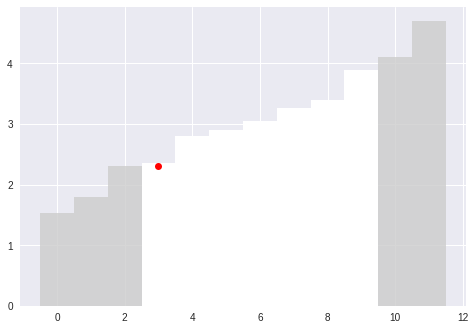

In [119]:
plt.style.use('seaborn')
w = 1.0

fig, ax = plt.subplots()
ax.plot(less*w, m0,'ro')

ax.bar(np.arange(0, less_critical+1, 1), values[0:less_critical+1], w, color=(0.8, 0.8, 0.8, 0.8))
ax.bar(np.arange(less_critical+1, greater_critical, 1), values[less_critical+1:greater_critical], w, color=(1.0, 1.0, 1.0, 1.0))
ax.bar(np.arange(greater_critical, n, 1), values[greater_critical:n], w, color=(0.8, 0.8, 0.8, 0.8))

In [120]:
info = f"""
    Zero hypothesa is { less_critical < less < greater_critical }

    left criteria: [0, {less_critical}]
    right criteria: [{greater_critical}, {n}]
"""
print(info)


    Zero hypothesa is True

    left criteria: [0, 2]
    right criteria: [10, 12]

